In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Handling Missing Values and One-Hot Encoding
In this section, we will handle missing values in the 'Age' column by imputing the mean age. We will also perform one-hot encoding for the 'Embarked' column to convert categorical data into numerical format.


In [5]:
# Handling missing values

# Handling missing values in the 'Age' column
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)


# Fill missing values in 'Age' column with the median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' column with the mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Dropping irrelevant columns
columns_to_drop = ['Name', 'Ticket', 'Cabin']
existing_columns_to_drop = [col for col in columns_to_drop if col in titanic_df.columns]
if existing_columns_to_drop:
    titanic_df.drop(existing_columns_to_drop, axis=1, inplace=True)

C:\Users\livhuwanim\AppData\Local\Temp\ipykernel_24532\1171461276.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
C:\Users\livhuwanim\AppData\Local\Temp\ipykernel_24532\1171461276.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [6]:
titanic_df = pd.get_dummies(titanic_df, columns=['Sex'], drop_first=False)


### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [7]:
# Handle missing values in 'Age' column
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

# One-Hot Encoding for 'Embarked' column
if 'Embarked' in titanic_df.columns:
    titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=False)
else:
    print("Column 'Embarked' not found in the DataFrame")

C:\Users\livhuwanim\AppData\Local\Temp\ipykernel_24532\3190505228.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)


Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [8]:
# Define features and target
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
target = 'Survived'

X = titanic_df[features]
y = titanic_df[target]


Split the data into training (60%), development (20%), and test (20%) sets

### Splitting Data
We split the data into training, development, and test sets to evaluate the performance of our model at different stages.
- **Training Set**: Used to train the model.
- **Development Set**: Used to validate the model during training.
- **Test Set**: Used to test the final model.

In [9]:
# Splitting the data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)


# Further splitting the temporary set into development and test sets
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


Train a Decision Tree and Plot It:
Train the decision tree on the training set.
Plot the decision tree.

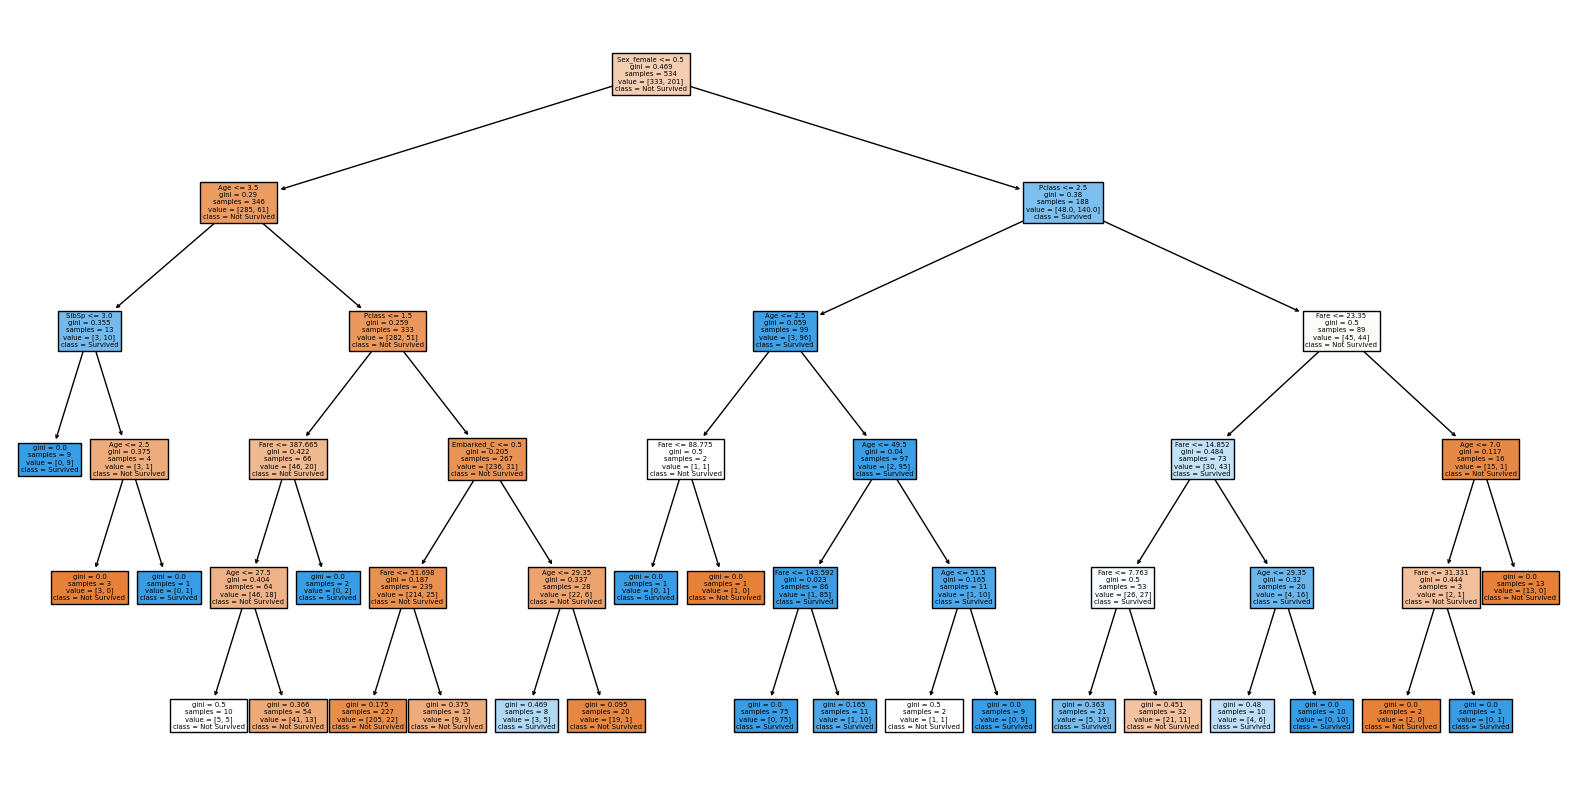

In [10]:
# Train the decision tree
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()


Compute Model’s Accuracy on the Development Set:

In [11]:
y_pred_dev = clf.predict(X_dev)
accuracy_dev = accuracy_score(y_dev, y_pred_dev)
print(f'Development set accuracy: {accuracy_dev:.2f}')


Development set accuracy: 0.74


Experiment with Different max_depth Values and Store Results:
Loop through different max_depth values, train models, and store accuracies.

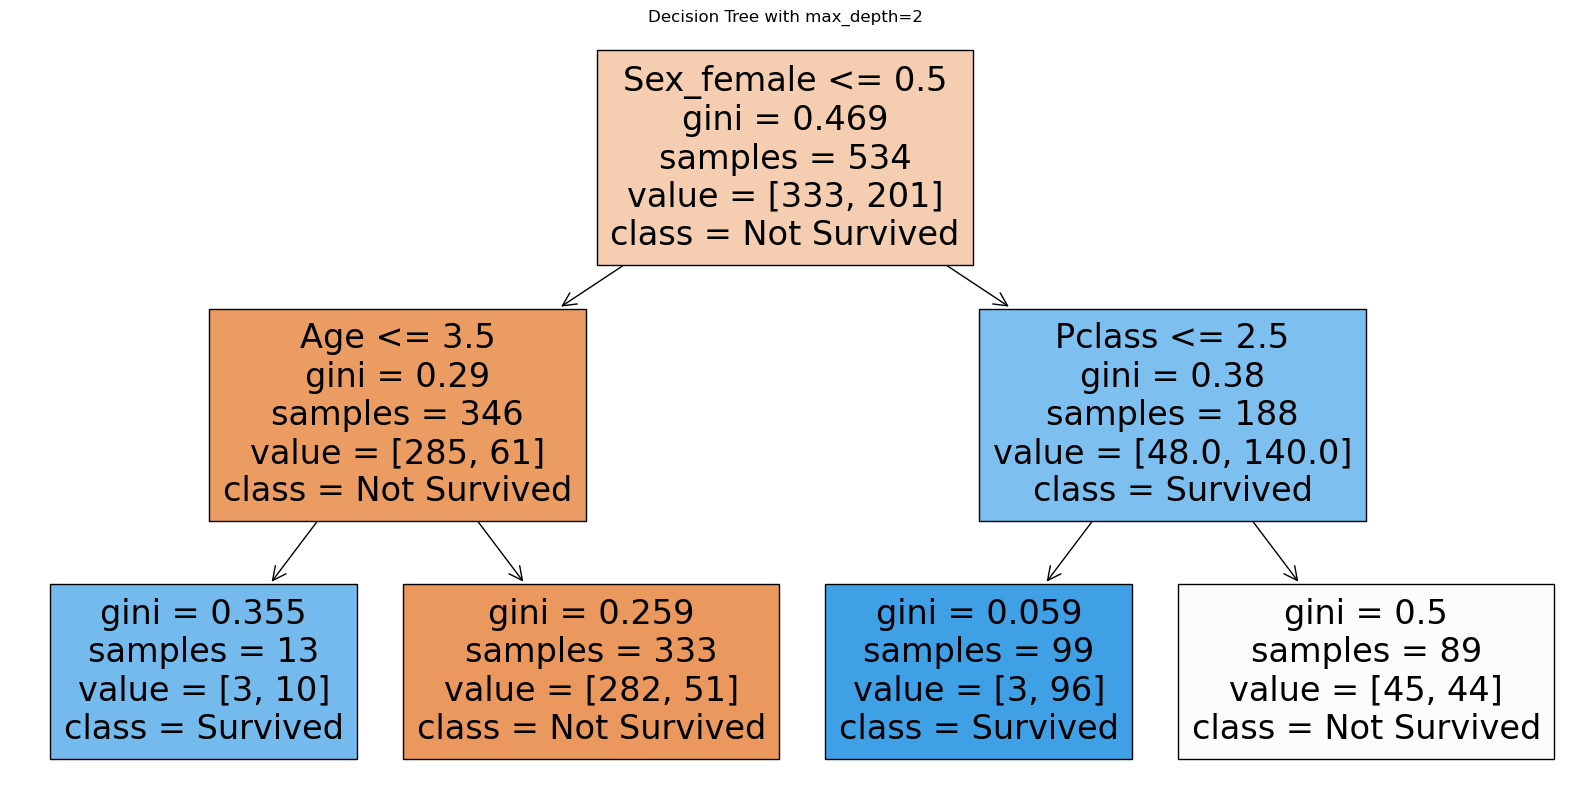

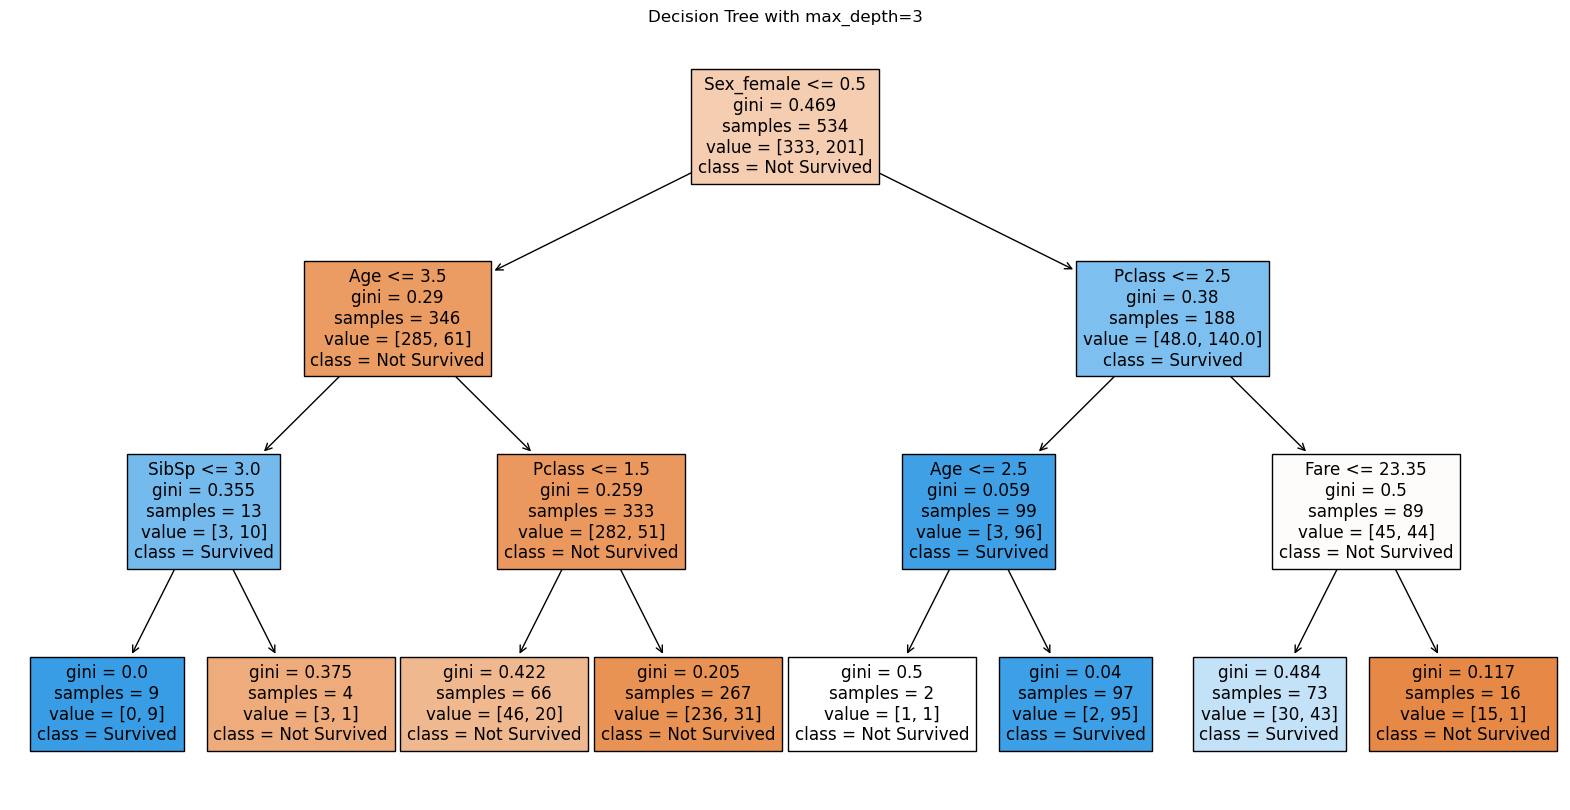

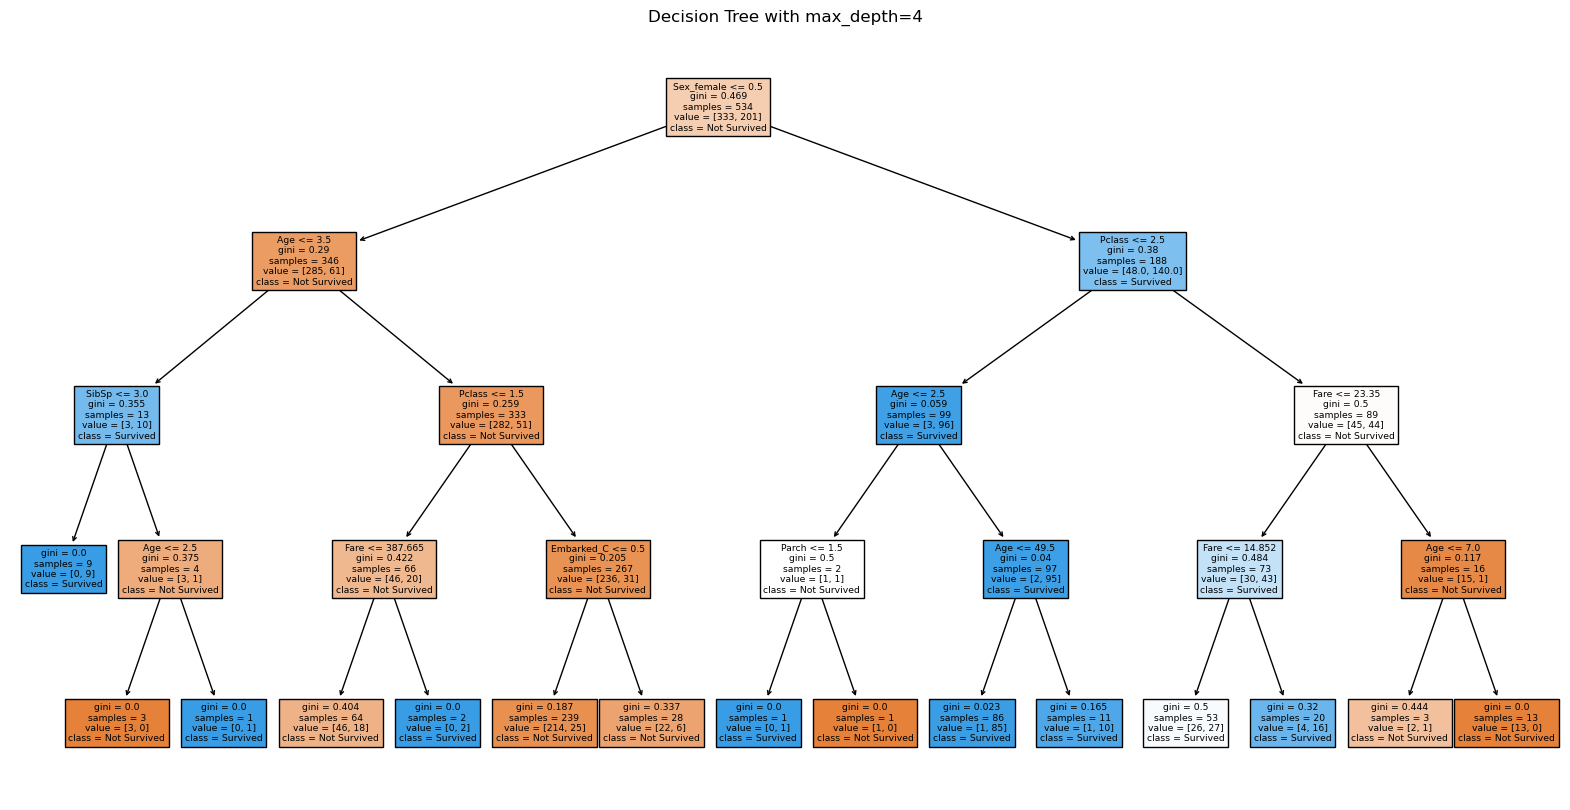

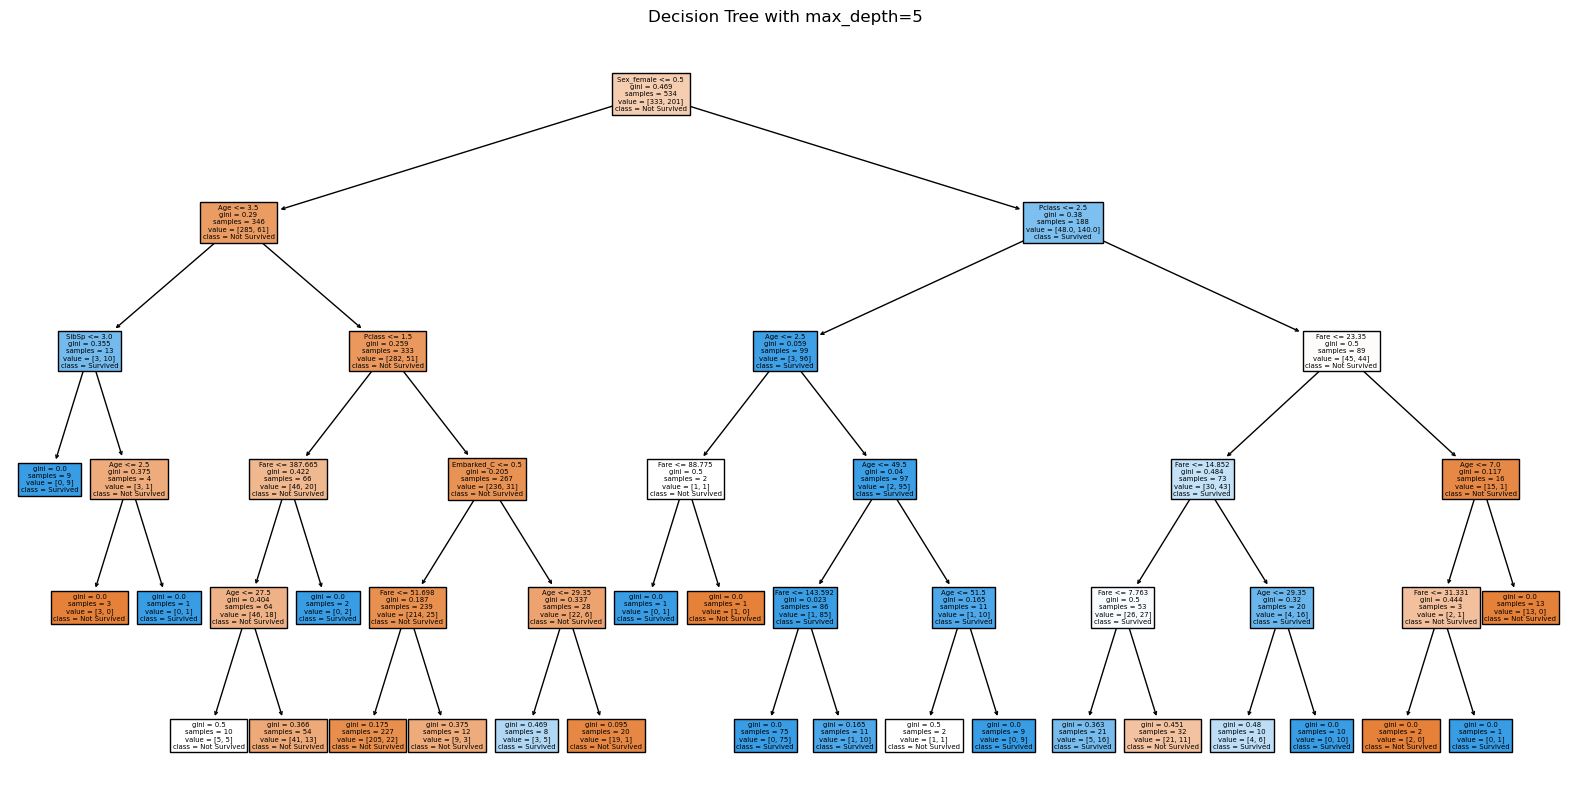

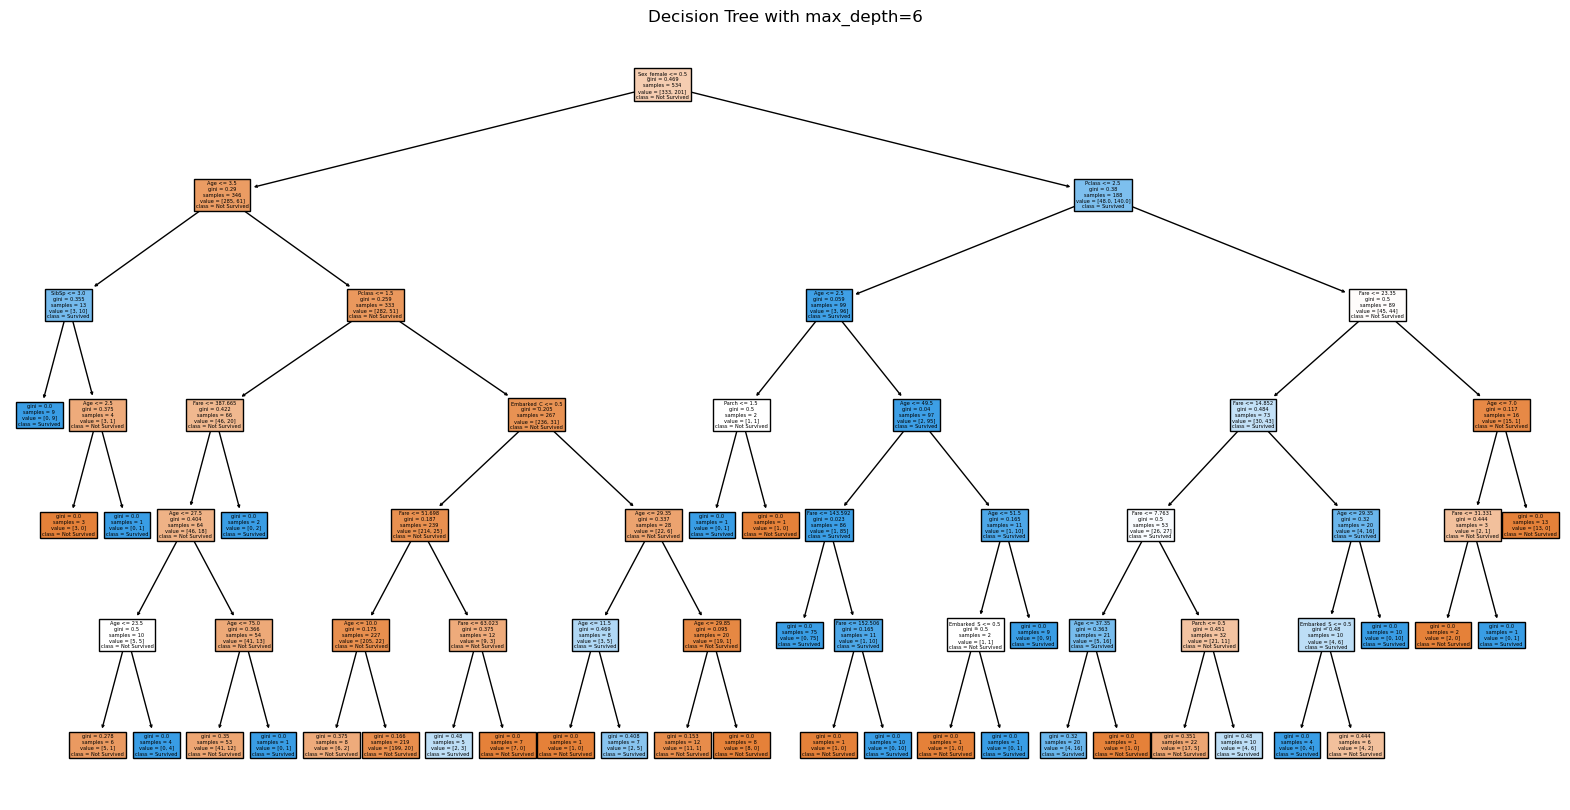

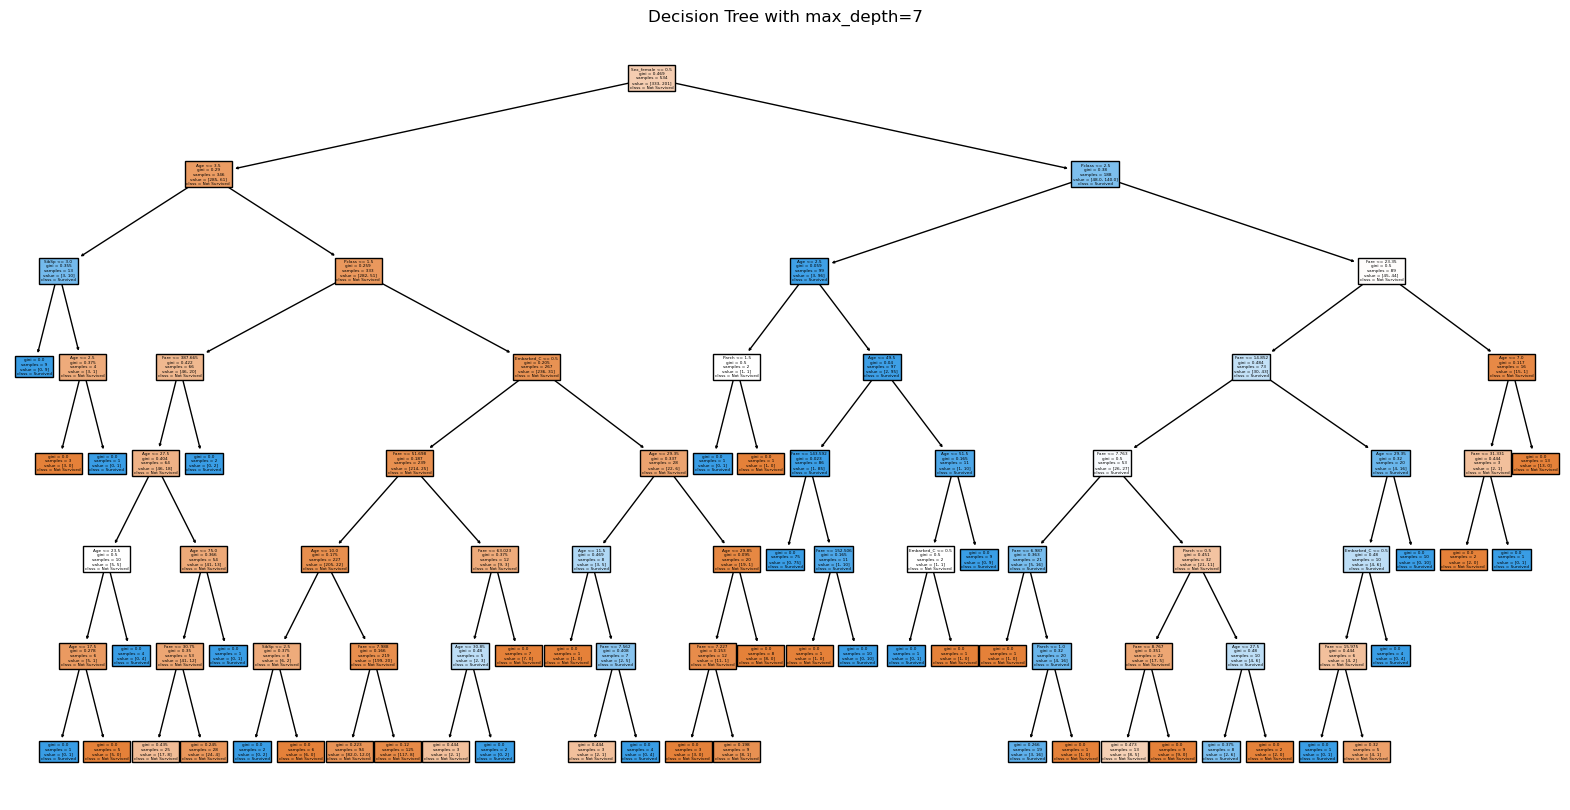

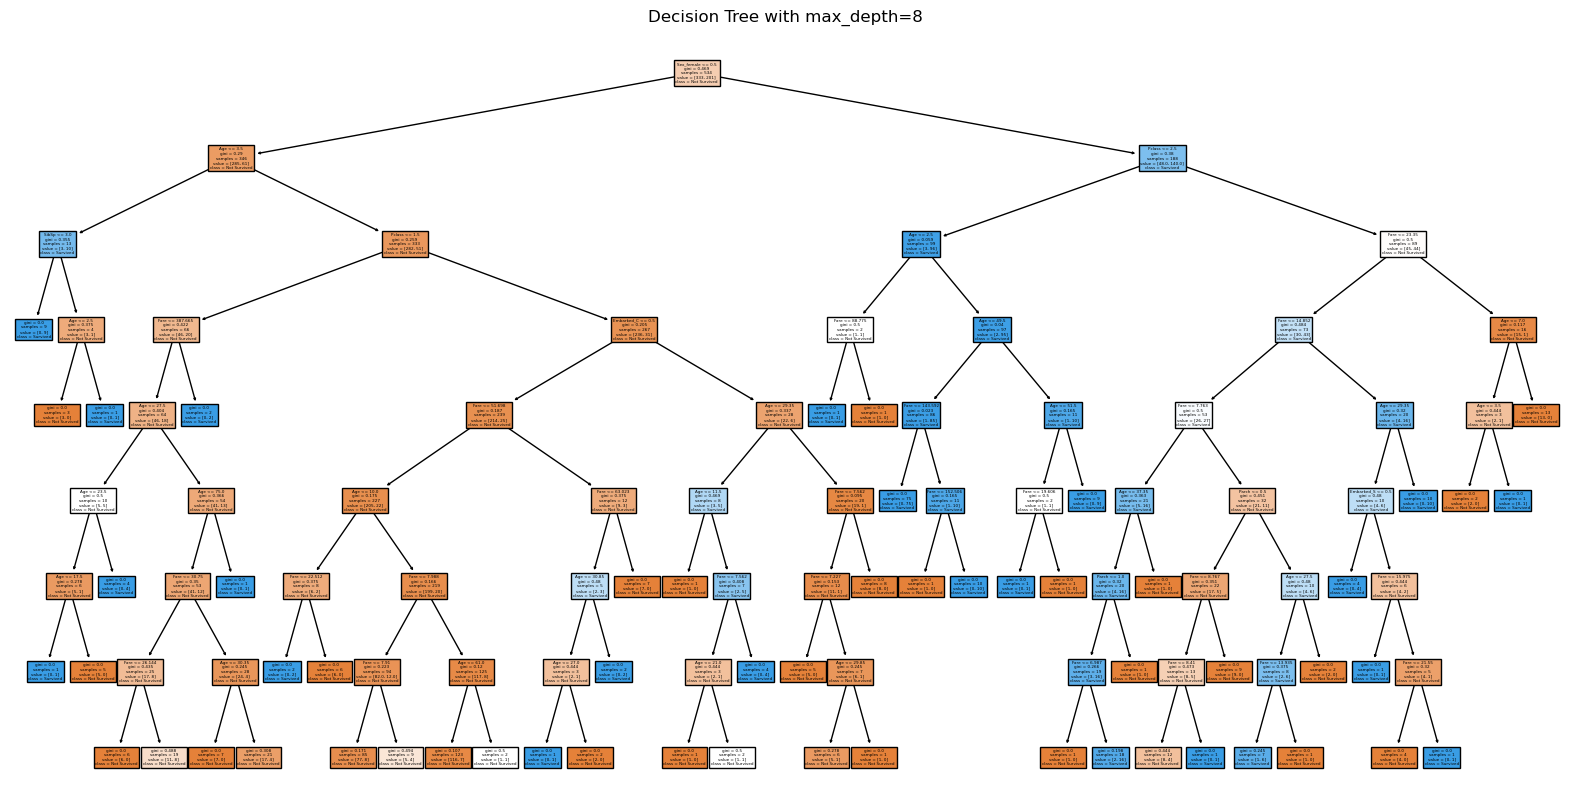

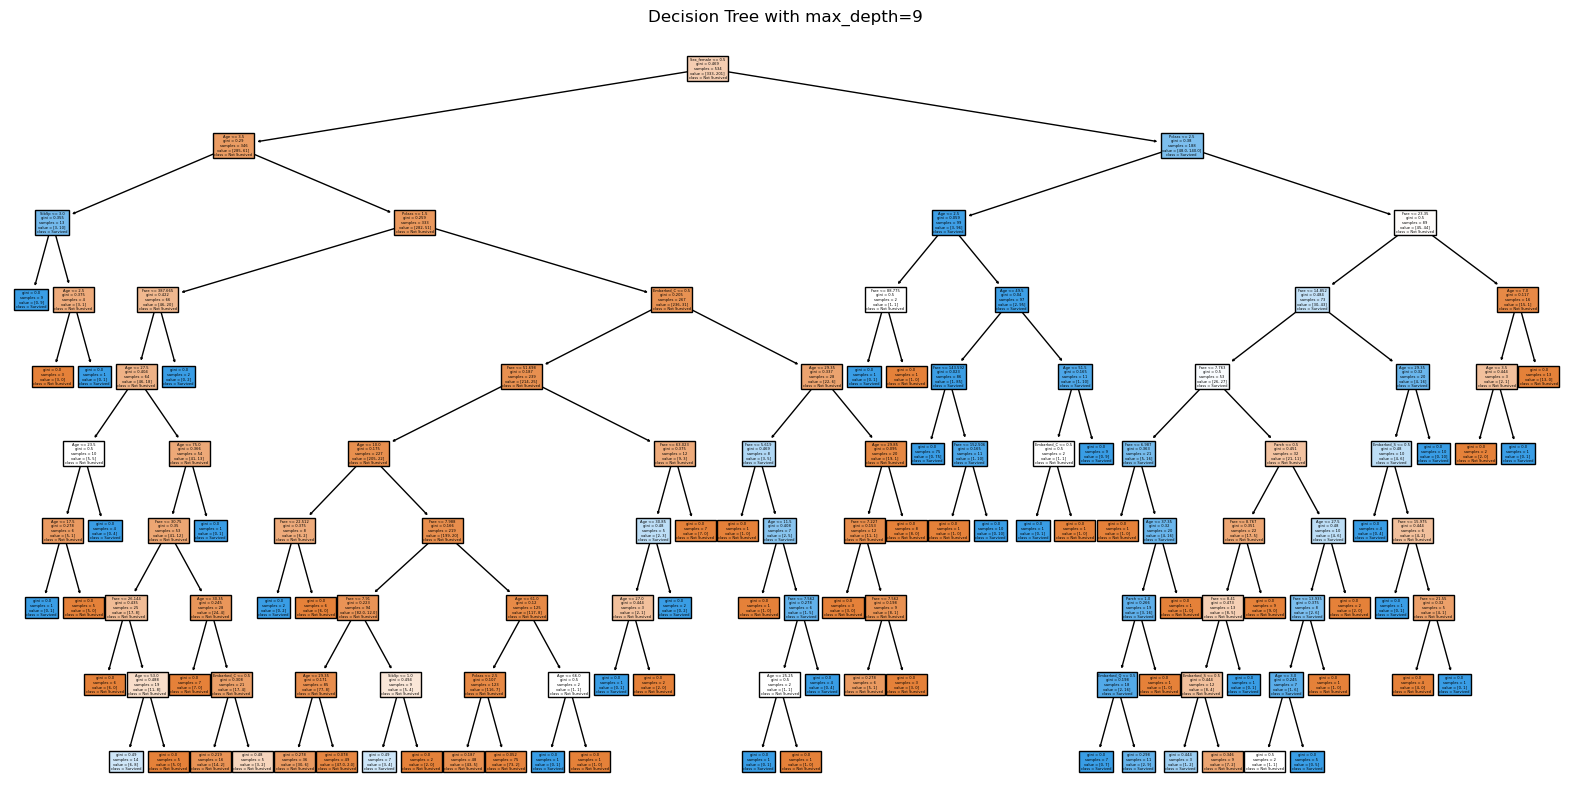

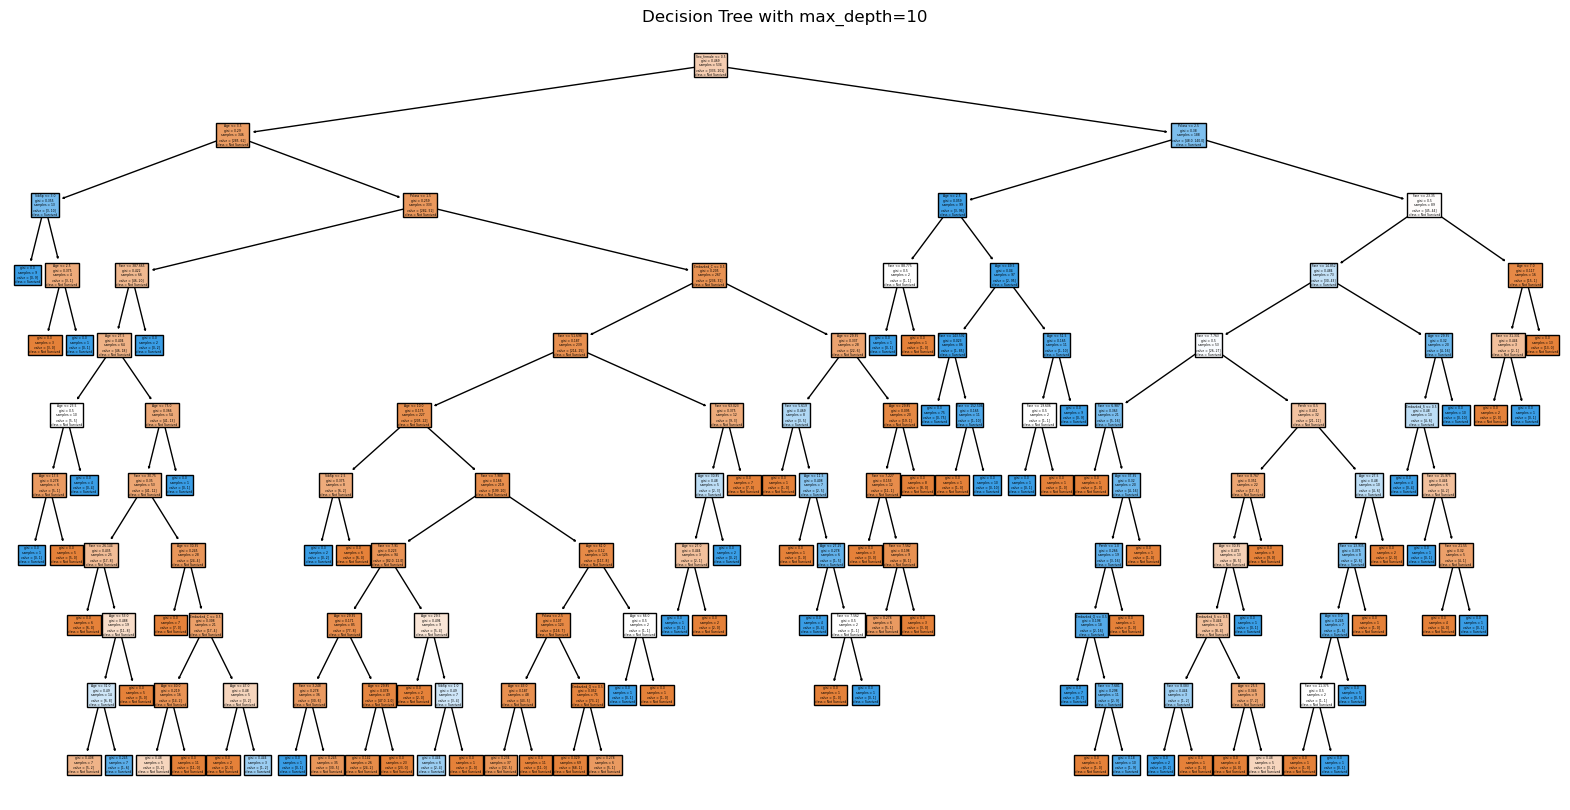

In [12]:
# Experiment with different max_depth values
depths = range(2, 11)
train_accuracies = []
dev_accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, clf.predict(X_train)))
    dev_accuracies.append(accuracy_score(y_dev, clf.predict(X_dev)))
    
    # Plot the decision tree for each depth
    plt.figure(figsize=(20,10))
    plot_tree(clf, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True)
    plt.title(f'Decision Tree with max_depth={depth}')
    plt.show()


Plot Training and Development Accuracies:

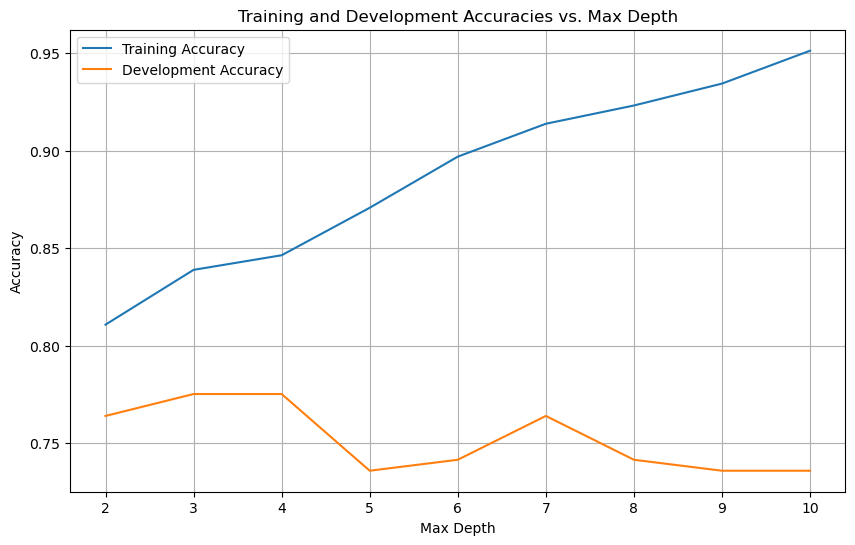

Training Accuracy Shape: Training accuracy generally increases with max_depth, possibly reaching a plateau.
Development Accuracy Shape: Development accuracy initially increases and then may decrease, indicating overfitting at higher depths.


In [13]:
# Plot training and development accuracies
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy')
plt.plot(depths, dev_accuracies, label='Development Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Development Accuracies vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()

# Analyze the shape of the lines
train_acc_shape = "Training accuracy generally increases with max_depth, possibly reaching a plateau."
dev_acc_shape = "Development accuracy initially increases and then may decrease, indicating overfitting at higher depths."
print(f'Training Accuracy Shape: {train_acc_shape}')
print(f'Development Accuracy Shape: {dev_acc_shape}')

Report Final Model Accuracy on the Test Set:
Choose the best max_depth based on development set accuracy.
Train the final model on the combined training and development sets.
Evaluate the final model on the test set.

In [15]:
# Choose best max_depth based on development set accuracy
best_depth = depths[dev_accuracies.index(max(dev_accuracies))]
final_clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_clf.fit(pd.concat([X_train, X_dev]), pd.concat([y_train, y_dev]))

# Evaluate on the test set
y_pred_test = final_clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Test set accuracy with max_depth={best_depth}: {accuracy_test:.2f}')


Test set accuracy with max_depth=3: 0.82


Training and Evaluating Bagged Trees Model

In [16]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train a Bagged Trees model
bagged_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagged_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_bagged = bagged_model.predict(X_test)
accuracy_bagged = accuracy_score(y_test, y_pred_bagged)
print(f'Bagged Trees Model Accuracy: {accuracy_bagged}')


Bagged Trees Model Accuracy: 0.776536312849162


This code trains and evaluates a Bagged Trees model:

BaggingClassifier is used with DecisionTreeClassifier as the base estimator.
The model is trained on the training set.
Predictions are made on the test set.
The accuracy of the model is calculated and printed.

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Determine feature importance
feature_importances = pd.Series(random_forest_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(f'Random Forest Model Accuracy: {accuracy_rf}')
print('Feature Importances:')
print(feature_importances)


Random Forest Model Accuracy: 0.7988826815642458
Feature Importances:
Fare          0.246673
Age           0.233400
Sex_male      0.171409
Sex_female    0.136033
Pclass        0.082374
SibSp         0.048058
Parch         0.040262
Embarked_C    0.017998
Embarked_S    0.015311
Embarked_Q    0.008481
dtype: float64


This code trains and evaluates a Random Forest model:

RandomForestClassifier is used with 100 trees.
The model is trained on the training set.
Predictions are made on the test set.
The accuracy of the model is calculated and printed.
Feature importance is calculated and displayed to show which features contribute the most to the predictions.

Training and Evaluating Boosted Trees Model


In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Boosted Trees model
boosted_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosted_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_boosted = boosted_model.predict(X_test)
accuracy_boosted = accuracy_score(y_test, y_pred_boosted)
print(f'Boosted Trees Model Accuracy: {accuracy_boosted}')


Boosted Trees Model Accuracy: 0.8100558659217877


This code trains and evaluates a Boosted Trees model:

GradientBoostingClassifier is used with 100 trees.
The model is trained on the training set.
Predictions are made on the test set.
The accuracy of the model is calculated and printed.

In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and the best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f'Best Parameters for Random Forest: {best_params}')
print(f'Best Accuracy for Random Forest (cross-validation): {best_accuracy}')


Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 50}
Best Accuracy for Random Forest (cross-validation): 0.8277905131370129


This code tunes the Random Forest model by searching for the best combination of parameters:

GridSearchCV is used to search for the best n_estimators and max_depth values.
The model is trained on the training set with 5-fold cross-validation.
The best parameters and the corresponding accuracy are printed.

Summary of Model Accuracies

In [20]:
# Summary of model accuracies
print(f'Bagged Trees Model Accuracy: {accuracy_bagged}')
print(f'Random Forest Model Accuracy: {accuracy_rf}')
print(f'Boosted Trees Model Accuracy: {accuracy_boosted}')
print(f'Best Random Forest Model (cross-validation): {best_accuracy} with parameters: {best_params}')


Bagged Trees Model Accuracy: 0.776536312849162
Random Forest Model Accuracy: 0.7988826815642458
Boosted Trees Model Accuracy: 0.8100558659217877
Best Random Forest Model (cross-validation): 0.8277905131370129 with parameters: {'max_depth': 10, 'n_estimators': 50}


This code summarizes and prints the accuracy of all models and the best-performing Random Forest model along with its optimal parameters.